In [199]:
import numpy as np
import os
from skimage.metrics import mean_squared_error
from PIL import Image
import matplotlib.pyplot as plt

In [206]:
ref_image = np.array(Image.open("../build/reference/mis/mis-S5000.png")) # 1000 samples (PowerHeuristic)

In [207]:
base_folder = "../build"
figures_output = "figures"

if not os.path.exists(figures_output):
    os.makedirs(figures_output)

In [212]:
NSPP = 50
folder_name = "MIS-"
folder_list = ["Reference", "Equal", "BRDF", "Light", "T0-01", "T0-5", "T1", "T1-5", "T2"]
label_list = ["Reference", "Equal", "BRDF", "Light", "T=0.01", "T=0.5", "T=1", "T=1.5", "T=2"]

In [213]:
def get_alpha_map(filename):
    
    map_data = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            map_data.append([ float(n) for n in line.replace(';\n', '').split(';') ])
        
    return np.array(map_data)

In [214]:
def display_and_save(filename, label, np_image, alpha_map):
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2, gridspec_kw={'width_ratios': [1.33, 1.67]})
    plt.suptitle(label)
    rmse = np.sqrt(mean_squared_error(np_image, ref_image))
    ax1.imshow(np_image, clim=(0, 255))
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.set_title(f'RMSE: {rmse:.3f}')

    pos_neg_clipped = ax2.imshow(alpha_map, cmap='RdBu', clim=(0, 1))
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.set_title('alpha-map')

    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    cbar = fig.colorbar(pos_neg_clipped, ax=ax2, location='right', anchor=(0, 0.5), shrink=0.8)
    fig.savefig(filename)
    

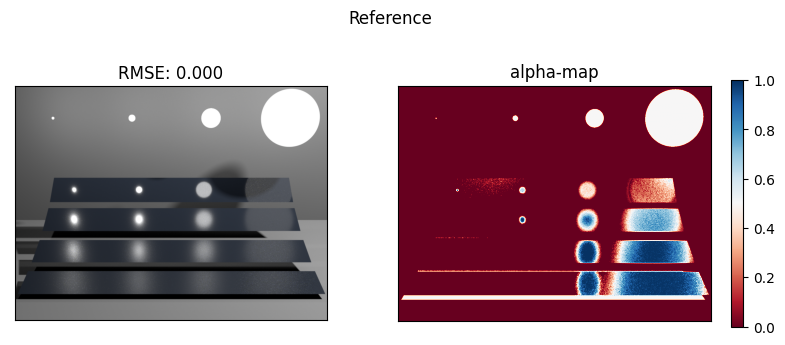

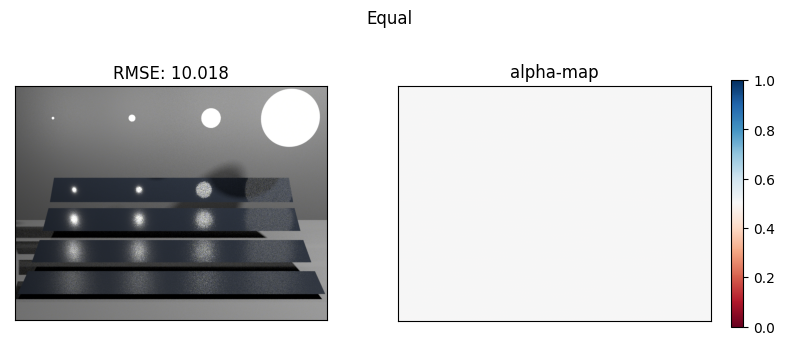

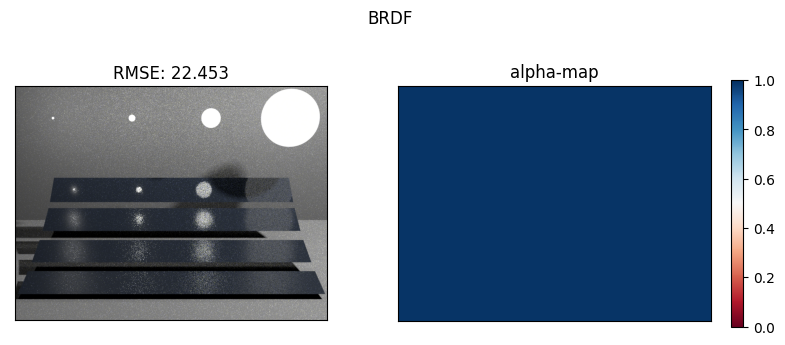

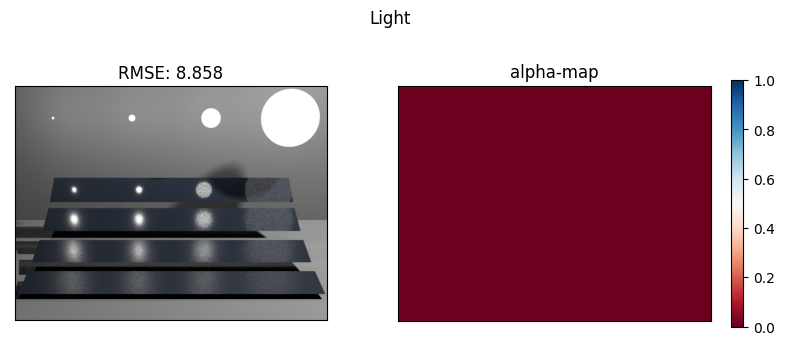

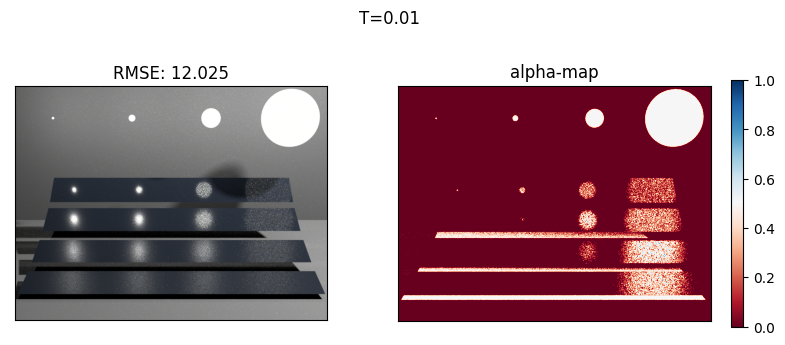

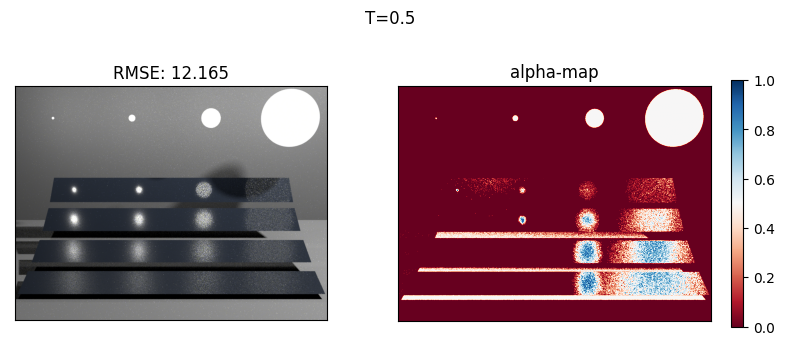

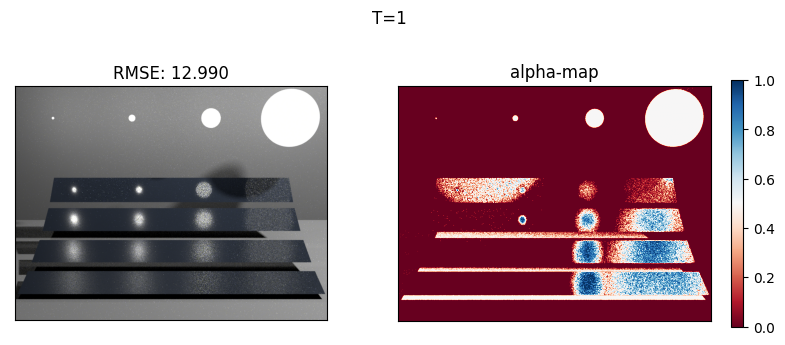

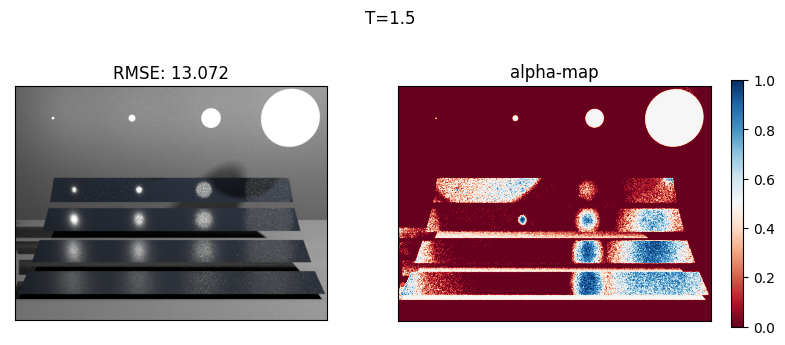

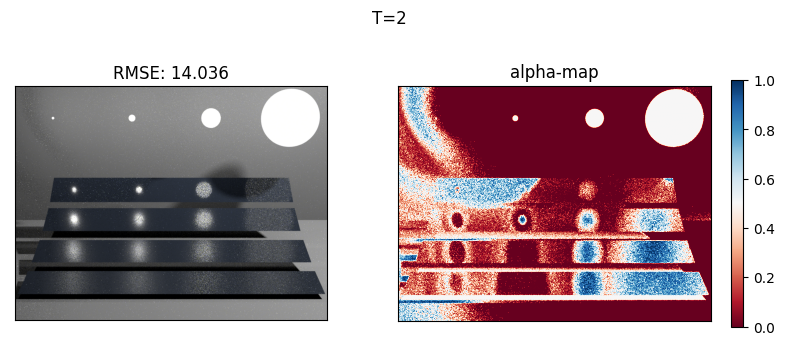

In [215]:
for i, elem in enumerate(folder_list):
    folder = os.path.join(base_folder, folder_name + elem)
    
    if elem != 'Reference':
        image_name = os.path.join(folder, 'mis', f'mis-S{NSPP}.png')
        map_file_name = os.path.join(folder, 'mis', f'mis-S{NSPP}.map')
    else:
        image_name = os.path.join(folder, 'mis', f'mis-S5000.png')
        map_file_name = os.path.join(folder, 'mis', f'mis-S5000.map')
    
    alpha_map = get_alpha_map(map_file_name)
    np_image = np.array(Image.open(image_name))
    _, mis_folder = os.path.split(folder)
    display_and_save(os.path.join(figures_output, mis_folder + '.pdf'), label_list[i], np_image, alpha_map)